In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = "../data/rawdata/winemag-data-130K-v2.csv"
df_one = pd.read_csv(df,index_col=0)
df_2 = df_one.dropna(subset=['points', 'price', 'country', 'variety'])
df_2.shape

(120915, 13)

In [2]:
df_2["variety"].value_counts()

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Cabernet Franc               1304
Champagne Blend              1211
Grüner Veltliner             1145
Pinot Grigio                 1002
Portuguese White              986
Viognier                      985
Gewürztraminer                955
Gamay                         836
Shiraz                        821
Petite Sirah  

In [3]:
Wine_types={'Bold Red': ['Malbec', 'Syrah','Red Blend','Shiraz', 'Mourvedre', 'Merlot','Bordeaux-style Red Blend', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Portuguese Red', 'Meritage'],
          'Medium Red': ['Meriot', 'Sangiovese', 'Rhône-style Red Blend','Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          'Light Red':['Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          'Light White': ['Bordeaux-style White Blend','Sauvignon Blanc', 'White Blend' , 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          'Rosé': ['Rosé','Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose', 'Sparkling Blend', 'Champagne Blend'],
          'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
          }
Wine_types.keys()

dict_keys(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White', 'Sweet White', 'Rosé', 'Sparkling', 'Dessert'])

In [4]:
for x in Wine_types.keys():
    for y in range(len(Wine_types[x])):
       print('type=',x,'subtype=',Wine_types[x][y])
       A=df_2[df_2.variety.str.contains(Wine_types[x][y],na=False)].index.tolist()
       df_2.loc[A,'vt']=x
idx = df_2['vt'].isnull( )
df_2.loc[idx,'vt']='Others'
df_2.head()

type= Bold Red subtype= Malbec
type= Bold Red subtype= Syrah


C:\Users\mwhaw\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mwhaw\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


type= Bold Red subtype= Red Blend
type= Bold Red subtype= Shiraz
type= Bold Red subtype= Mourvedre
type= Bold Red subtype= Merlot
type= Bold Red subtype= Bordeaux-style Red Blend
type= Bold Red subtype= Pinotage
type= Bold Red subtype= Petite Sirah
type= Bold Red subtype= Touriga Nacional
type= Bold Red subtype= Cabernet Sauvignon
type= Bold Red subtype= Portuguese Red
type= Bold Red subtype= Meritage
type= Medium Red subtype= Meriot
type= Medium Red subtype= Sangiovese
type= Medium Red subtype= Rhône-style Red Blend
type= Medium Red subtype= Zinfandel
type= Medium Red subtype= Cabernet Franc
type= Medium Red subtype= Tempranillo
type= Medium Red subtype= Nebbiolo
type= Medium Red subtype= Barbera
type= Medium Red subtype= Cotes du Rhone Blend
type= Light Red subtype= Pinot Noir
type= Light Red subtype= Grenache
type= Light Red subtype= Gamay
type= Light Red subtype= St. Laurent
type= Light Red subtype= Carignan
type= Light Red subtype= Counoise
type= Rich White subtype= Chardonnay
typ

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vt
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Dessert
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Light White
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Sweet White
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Light Red
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Medium Red


In [5]:
df_vt = df_2["vt"].value_counts()
df_vt

Bold Red       35983
Others         16037
Light Red      14829
Medium Red     13985
Rich White     12512
Light White    10871
Sweet White     5930
Dessert         4068
Sparkling       3439
Rosé            3261
Name: vt, dtype: int64

In [6]:
df_price = df_2.sort_values(by="price")
df_price

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vt
1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,Bold Red
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit,Rich White
112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,Medium Red
29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,Bold Red
117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis,Light White
110255,US,"A good everyday Merlot, dry and rich in tannin...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,Bold Red
61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,Bold Red
64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,Bold Red
59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,Rich White
20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,Light White


In [7]:
df_2.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [8]:
test_1= df_2.groupby("variety")
test_1.head()
min(test_1["price"].apply(lambda x : x.min()))

4.0

In [9]:
most_expensive_wine = df_2[df_2.price==min(test_1["price"].apply(lambda x : x.min()))]
most_expensive_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vt
1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,Bold Red
20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,Light White
29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,Bold Red
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit,Rich White
59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,Rich White
61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,Bold Red
64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,Bold Red
110255,US,"A good everyday Merlot, dry and rich in tannin...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,Bold Red
112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,Medium Red
117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis,Light White


In [10]:
test_1= df_2.groupby("variety")
test_1.head()
max(test_1["price"].apply(lambda x : x.max()))

3300.0

In [11]:
most_expensive_wine = df_2[df_2.price==max(test_1["price"].apply(lambda x : x.max()))]
most_expensive_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vt
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,Bold Red


In [12]:
'''
Most Expensive Wine: 
Name: Château les Ormes Sorbet 2013 Médoc
Variety: Bordeaux-Style Red Blend
Sub-type: Bold Red 
Country: France
Rating: 88
Price: $3300.00
'''   
'''
Cheapest Wine: 
Name: "Felix Solis 2013 Flirty Bird Syrah"
Variety: Syrah
Sub-type: Bold Red
Country: Spain
Rating: 85
Price: $4.00
'''

'\nCheapest Wine: \nName: "Felix Solis 2013 Flirty Bird Syrah"\nVariety: Syrah\nSub-type: Bold Red\nCountry: Spain\nRating: 85\nPrice: $4.00\n'

In [13]:
df_variety = df_2.groupby(["country"]).mean()
df_variety = df_variety.reset_index()
df_variety.head()


,country,points,price
0,Argentina,86.710330,24.510117
1,Armenia,87.500000,14.500000
2,Australia,88.595466,35.437663
3,Austria,90.190782,30.762772
4,Bosnia and Herzegovina,86.500000,12.500000


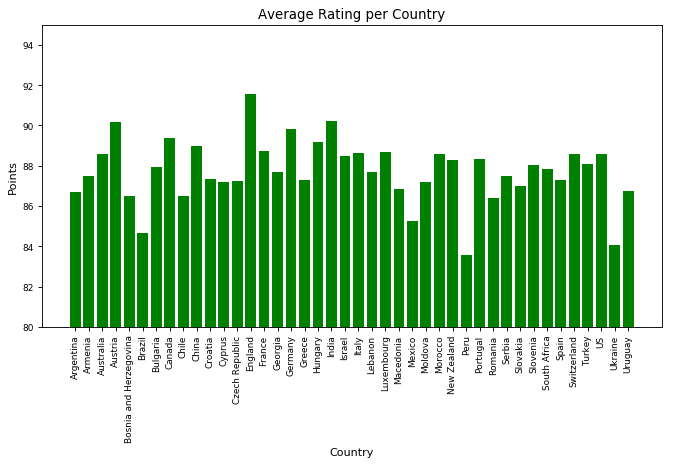

In [14]:
#l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
fig, ax= plt.subplots(num=1,figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
plt.ylim([80,95])
plt.xticks(rotation=90, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Points")
plt.title("Average Rating per Country")
plt.show()

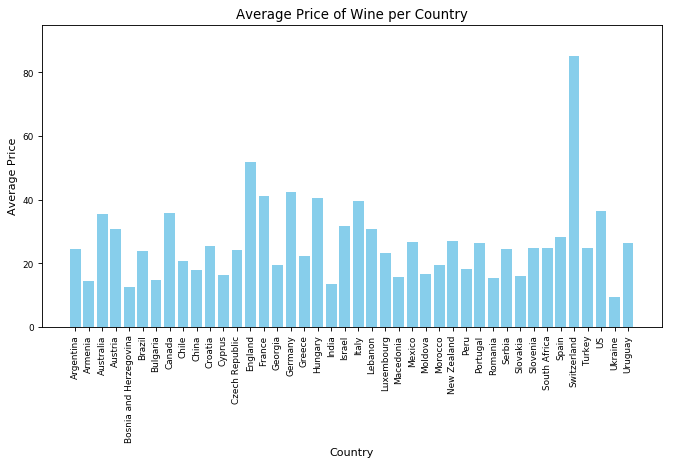

In [15]:
#l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
fig, ax= plt.subplots(num=1,figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1= ax.bar(df_variety["country"], df_variety["price"], color='skyblue')
plt.ylim([0,95])
plt.xticks(rotation=90, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Price")
plt.title("Average Price of Wine per Country")
plt.show()


In [16]:
df_2.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [39]:
bold_red = df_2.loc[df_2['vt']=='Bold Red']
bold_red_count_1 = bold_red['price'].max()
bold_red_count_1

3300.0

In [40]:
medium_red = df_2.loc[df_2['vt']=='Medium Red']
medium_red_count_1 = medium_red['price'].max()
medium_red_count_1

900.0

In [42]:
light_red = df_2.loc[df_2['vt']== 'Light Red']
light_red_count_1 = light_red['price'].max()
light_red_count_1

2500.0

In [44]:
rich_white = df_2.loc[df_2['vt']=='Rich White']
rich_white_count_1 = rich_white['price'].max()
rich_white_count_1

2013.0

In [45]:
light_white = df_2.loc[df_2['vt']=='Light White']
light_white_count_1 = light_white['price'].max()
light_white_count_1

1000.0

In [46]:
sweet_white = df_2.loc[df_2['vt']=='Sweet White']
sweet_white_count_1 = sweet_white['vt'].count()
sweet_white_count_1


5930

In [ ]:
rose = df_2.loc[df_2['vt']=='Rosé'] 
rose_count_1 = rose['vt'].count()
rose_count_1

In [47]:
sparkling = df_2.loc[df_2['vt']=='Sparkling']
sparkling_count_1 = sparkling['vt'].count()
sparkling_count_1

3439

In [48]:
dessert = df_2.loc[df_2['vt']=='Dessert']
dessert_count_1 = dessert['vt'].count()
dessert_count_1

4068

In [17]:
bold_red = df_2.loc[df_2['vt']=='Bold Red']
bold_red_count = bold_red['vt'].count()

medium_red = df_2.loc[df_2['vt']=='Medium Red']
medium_red_count = medium_red['vt'].count()

light_red = df_2.loc[df_2['vt']== 'Light Red']
light_red_count = light_red['vt'].count()

rich_white = df_2.loc[df_2['vt']=='Rich White']
rich_white_count = rich_white['vt'].count()

light_white = df_2.loc[df_2['vt']=='Light White']
light_white_count = light_white['vt'].count()

sweet_white = df_2.loc[df_2['vt']=='Sweet White']
sweet_white_count = sweet_white['vt'].count()

rose = df_2.loc[df_2['vt']=='Rosé'] 
rose_count = rose['vt'].count()

sparkling = df_2.loc[df_2['vt']=='Sparkling']
sparkling_count = sparkling['vt'].count()

dessert = df_2.loc[df_2['vt']=='Dessert']
dessert_count = dessert['vt'].count()



In [18]:
total_df = pd.DataFrame({"Bold Red": bold_red_count, "Medium Red": medium_red_count, "Light Red": light_red_count, 
                        "Rich White": rich_white_count, "Light White": light_white_count, "Sweet White": sweet_white_count,
                        "Rosé": rose_count, "Sparkling": sparkling_count, "Dessert": dessert_count}, index=[0])
total_df

,Bold Red,Medium Red,Light Red,Rich White,Light White,Sweet White,Rosé,Sparkling,Dessert
0,35983,13985,14829,12512,10871,5930,3261,3439,4068


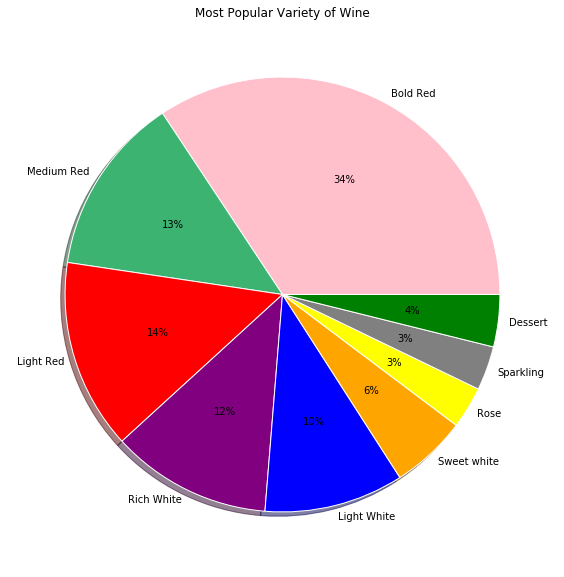

In [19]:
sizes = (bold_red_count, medium_red_count, light_red_count, rich_white_count,light_white_count, sweet_white_count, rose_count, sparkling_count,dessert_count  )

#sizes = sorted(sizes)

labels = 'Bold Red','Medium Red', 'Light Red','Rich White', 'Light White','Sweet white','Rose','Sparkling','Dessert'
colors = [ 'Pink', 'mediumseagreen', 'red', 'purple', 'blue', 'orange', 'yellow', 'grey', 'green']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(sizes, colors=colors,shadow=True,labels=labels, autopct="%1.00f%%",labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Most Popular Variety of Wine");

In [20]:
#determine which variety has the highest points
df_taster_points = df_2.groupby(["vt"]).mean()
df_taster_points = df_taster_points.reset_index()
df_taster_points.head()

,vt,points,price
0,Bold Red,88.473585,39.904872
1,Dessert,88.485988,27.626106
2,Light Red,89.299683,44.854542
3,Light White,87.512188,22.376598
4,Medium Red,88.632964,41.184197


In [29]:
df_taster_points= df_taster_points.sort_values("price")

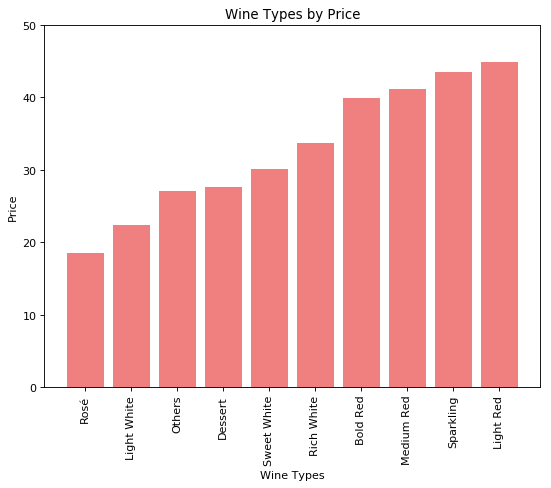

In [30]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.bar(df_taster_points["vt"], df_taster_points["price"], color='lightcoral')
plt.ylim([0,50])
plt.xticks(rotation=90)
plt.xlabel("Wine Types")
plt.ylabel("Price")
plt.title("Wine Types by Price")
plt.show()

In [33]:
df_taster_points= df_taster_points.sort_values("points")

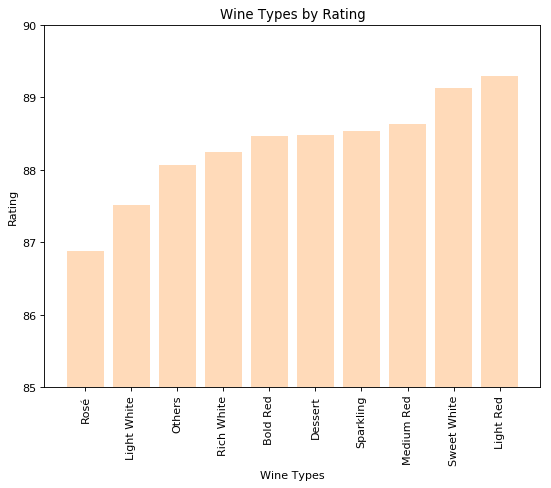

In [34]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(df_taster_points["vt"], df_taster_points["points"], color='peachpuff')
plt.ylim([85,90])
plt.xticks(rotation=90)
plt.xlabel("Wine Types")
plt.ylabel("Rating")
plt.title("Wine Types by Rating")
plt.show()

In [ ]:
'''
Original List format with replace: 
bins_rating= [80,85,90,95,100]
wine_rating = ["80-84", "85 to 89", "90 to 94", "100"]


df_2["Rating"]= pd.cut(df_2["points"], bins_rating, labels= wine_rating, right=False)

#Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Meritage'],
          #'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          #'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          #'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          #'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          #'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          #'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          #'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          #'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
        

#df_2["variety"] = df_2["variety"].replace(['Malbec', 'Syrah','Red Blend','Shiraz', 'Mourvedre', 'Merlot','Bordeaux-style Red Blend', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Portuguese Red', 'Meritage'], 'Bold Red')
#df_2["variety"] = df_2["variety"].replace(['Meriot', 'Sangiovese', 'Rhône-style Red Blend','Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'], 'Medium Red')
#df_2["variety"] = df_2["variety"].replace(['Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'], 'Light Red' )
#df_2["variety"] = df_2["variety"].replace(['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],'Rich White' )
#df_2["variety"] = df_2["variety"].replace(['Sauvignon Blanc', 'White Blend' , 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],  'Light White' )
#df_2["variety"] = df_2["variety"].replace(['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'], 'Sweet White' )
#df_2["variety"] = df_2["variety"].replace(['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],'Rose' )
#df_2["variety"] = df_2["variety"].replace(['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose', 'Sparkling Blend', 'Champagne Blend'], 'Sparkling')
#df_2["variety"] = df_2["variety"].replace(['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez'], 'Dessert' )

#df_2.head()
'''